In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download stock data
ticker_symbol = 'TATAMOTORS.NS'
start_date = '2022-01-01'
end_date = '2023-01-01'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

In [4]:
# Drop NaN values and unnecessary columns
stock_data.dropna(inplace=True)
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return']]


In [5]:
# Example: Adding Moving Averages
stock_data['MA_10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()

In [6]:
# Split the Data into Training and Testing Sets
X = stock_data.drop('Daily_Return', axis=1)
y = np.where(stock_data['Daily_Return'].shift(-1) > 0, 1, 0)  # 1 if next day's return is positive, 0 otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Check for NaN values in input features
print(X_train.isnull().sum())


Open       0
High       0
Low        0
Close      0
Volume     0
MA_10      8
MA_50     36
dtype: int64


In [8]:
# Check for NaN values in input features
print(X_train.isnull().sum())


Open       0
High       0
Low        0
Close      0
Volume     0
MA_10      8
MA_50     36
dtype: int64


In [9]:
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')


In [10]:
# Fit the imputer to X_train and transform X_train
X_train_imputed = imputer.fit_transform(X_train)


In [11]:
# Define the pipeline
pipeline = Pipeline([
    ('imputer', imputer),  # Impute NaN values with the mean of each column
    ('regressor', LinearRegression())  # Linear regression model
])


In [12]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

In [13]:
# Make predictions
predictions = pipeline.predict(X_test)


In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.28221701036422236


In [16]:
# Create new_data with the same columns as X_train
new_data = pd.DataFrame({
    'Open': [150],
    'High': [155],
    'Low': [148],
    'Close': [152],
    'Volume': [10000000],
    'MA_10': [150.5],  # Replace with actual moving averages for new_data
    'MA_50': [155.5]   # Replace with actual moving averages for new_data
})

# Use the model to make predictions for new_data
prediction = pipeline.predict(new_data)
print(f'Predicted Return: {prediction[0]}')

Predicted Return: 1.5832934611502134


In [17]:
# Get the coefficients of the linear regression model
coefficients = pipeline.named_steps['regressor'].coef_


In [18]:
# Get the names of the features
feature_names = X.columns

In [19]:
# Create a DataFrame to display the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [20]:
# Sort the coefficients dataframe by absolute value
coefficients_df['Absolute_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)


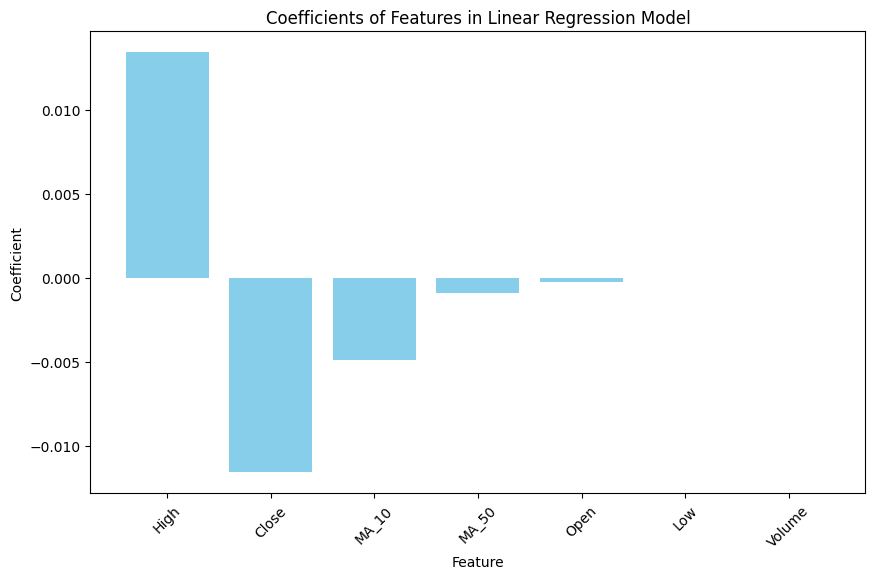

In [21]:
# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients of Features in Linear Regression Model')
plt.xticks(rotation=45)
plt.show()

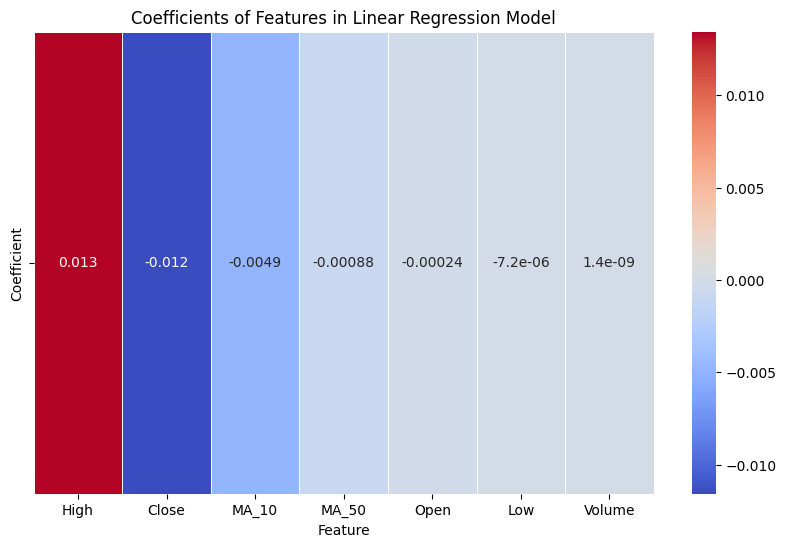

In [22]:
# Create a heatmap of the coefficients
plt.figure(figsize=(10, 6))
sns.heatmap(coefficients_df.set_index('Feature')['Coefficient'].to_frame().T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Coefficients of Features in Linear Regression Model')
plt.show()


In [23]:
# Print the predicted return and decision
print(f'Predicted Return: {prediction[0]}')
if prediction > 0:
    print("Buy the stock.")
else:
    print("Sell the stock.")

Predicted Return: 1.5832934611502134
Buy the stock.
